# Numpy.random packagage
***
This notebook is part of the assessment of the course "Programming for Data Analysis". It explains the use of Numpy.random package and demostrates some features and distributions.
<br>
<br>

## What is numpy and numpy.random package?
**Numpy** is a python library that perform efficient calculations on multidimensional array and matrix data structures.
<br>
**numpy.random package** produces pseudo random numbers using combinations of a BitGenerator to create sequences and a Generator to use those sequences to sample from different statistical distributions. <br>

<br>*[reference: https://numpy.org/doc/stable/reference/random/index.html?highlight=numpy%20random#module-numpy.random]*

## Simple Random Data 
**Why do we need random data?** <br>
Random numbers are used for various purposes, from statistical analysis and probability theory, to cryptography and computer simulation. 
<br>
<br>
**How to generate random data?**<br>
Generating Psuedo-random number is easy, get a new instance of generator first, then simply call .random(). Note the default type is a float.

In [16]:
# set up
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<br>

#### Generate random floats
It returns random float number or array of random float number between 0(inclusive) and 1 (exclusive). 

In [3]:
# get a new instance of Generator
rng = np.random.default_rng()

# Let's try generating 3 random float
a = rng.random(size=3) #size indicates number of random floats returned
print(a)

[0.64690451 0.58938223 0.37716714]


In [14]:
# generate a 4-row x 2-element array of floats
rng.random((4,2))

array([[0.24776694, 0.19104799],
       [0.36501748, 0.92423603],
       [0.41729289, 0.6299754 ],
       [0.01181768, 0.210706  ]])

In [15]:
# to generate a 2x2 array of negative float between -1 to 0 (exclusive)
1*rng.random((2,2))-1

array([[-0.9369403 , -0.77229315],
       [-0.34802802, -0.89977997]])

<br>

#### Generate random integer
It allows user to specify lower and upper bound of the integer, and the shape of output returned. Upper bound is default to be exclusive, unless specify endpoint as True. Lower bound, upper bound and size can be an integer or an array.

In [9]:
# generate 8 random integers between 0-2 inclusive
# default as sampling from a discrete uniform distribution

rng.integers(low=0, high=2,size=8, endpoint=True)

# if endpoint set to false or not specified, 
# there will be only 1 and 0 in the array

array([0, 1, 1, 2, 2, 0, 2, 2], dtype=int64)

In [7]:
# generate a 2-row x 5-element array of integers
rng.integers(low=1,high=5, size=[2,5])

array([[1, 3, 4, 3, 4],
       [1, 4, 2, 1, 3]], dtype=int64)

In [10]:
# generating a 4x2 array with lists of lower and upper bounds
# with first element in all rows between 1 to 4, 
#　second elements between 2 to 5 (inclusive)

rng.integers(low=[1,2],high=[4,5], size=(4,2), endpoint=True)

array([[3, 2],
       [1, 4],
       [4, 5],
       [4, 5]], dtype=int64)

<br>

#### Generate random sample from a given array
The function **.choice()** generates random sample from a given array. It takes 6 parameters, allows rooms for customization, supports numpy array. The parameters are the given array or int, size of output, with or without replacement, set probability of each array or int, axis to permute, and option to shuffle the sample when sampling without replacement. It follows an uniform distribution if probability is not specified.
<br>
<br>
Let's say we are simulating tossing a die 10 times and see the results

In [36]:
# .choice()
die = np.arange(1,7) #a die with 6 faces
# assume a fair die, with equal probability of each face
a = rng.choice(a=die, size=100)
print("a fair die") 
print(a)
print("----------------------------------")


# Now the die is no longer fair, but with a given list of probability
prob=[0.38, 0.28, 0.18, 0.08, 0.05, 0.03]
b = rng.choice(a=die, p=prob, size=100)
print("an unfair die")
print(b)
print("----------------------------------")

print(f"Mean of 100 fair die toss is ", a.mean())
print(f"Median of 100 fair die toss is ", np.median(a))
print("")
print(f"Mean of 100 unfair die toss is ", b.mean())
print(f"Median of 100 unfair die toss is ", np.median(b))

a fair die
[6 6 2 4 3 2 5 5 4 4 3 1 6 2 6 4 1 3 4 4 5 4 1 2 3 2 4 6 4 3 2 2 2 6 4 1 5
 1 1 2 1 5 3 2 3 5 5 6 1 4 3 6 1 1 5 3 6 2 1 3 6 6 1 6 5 6 2 2 1 5 2 6 1 6
 4 4 6 3 1 3 1 1 2 1 3 2 1 6 2 5 6 4 2 4 4 3 6 2 3 1]
----------------------------------
an unfair die
[3 2 1 5 2 1 2 6 2 3 1 4 3 4 1 4 3 1 2 2 4 4 2 1 1 3 1 2 2 2 4 2 2 2 2 2 1
 1 1 1 5 6 1 3 6 1 3 1 2 2 3 3 3 4 1 1 4 1 2 3 1 2 2 2 5 1 2 3 1 1 1 2 1 2
 1 2 4 1 2 1 3 1 1 2 3 2 1 1 4 2 4 2 4 3 1 1 2 1 2 2]
----------------------------------
Mean of 100 fair die toss is  3.36
Median of 100 fair die toss is  3.0

Mean of 100 unfair die toss is  2.26
Median of 100 unfair die toss is  2.0


Demostrates **replacement parameter** by simulating drawing card from a deck of 10 cards

In [45]:
# create a deck of 10 cards
card = np.arange(1,11) 

#draw 10 cards out of 10, without replacement
no_replace = rng.choice(a=card,size=10,replace=False)
print(f"The 10 cards drawn (without replacement) are:", no_replace)
print("")

#draw 10 cards out of 10, with replacement
replace = rng.choice(a=card,size=10,replace=True)
print(f"The 10 cards drawn (with replacement) are:", replace)
print("")

# draw 3 cards out of 10, repeat 10 times with replacement
draw10times= rng.choice(a=card,size=(10,3))
print(f"The results of 10 trials of drawing 3 cards from a deck of 10 are: \n", draw10times)

The 10 cards drawn (without replacement) are: [ 5  4  2  6  3  1  8  7 10  9]

The 10 cards drawn (with replacement) are: [ 6 10  5  3  8  3  8  7  5  5]

The results of 10 trials of drawing 3 cards from a deck of 10 are: 
 [[ 1  8 10]
 [ 7  5  6]
 [ 2  2  3]
 [ 3  6  4]
 [ 9  4  3]
 [10  8  3]
 [10  3  9]
 [ 8  8 10]
 [10  1  6]
 [ 3 10  9]]


**bytes**

In [46]:
 # return a string of random bytes with length of 7 
a = rng.bytes(7)
print (a, type(a)) # the bytes and is of type bytes


b'\xbe\xd7q\xd6\xb8\xb1\x93' <class 'bytes'>


<br>
<br>

## Permutation


#### Shuffle
It takes 2 paramenters, the numpy array, and the axis to shuffle (default to 0 if not given). It shuffles the numpy array in place, meaning the numpy array itself is changed. If a 2D array is given, order of sub-arrays is changed, but contents in the sub-arrays remain the same, works on 1D and 2D arrays.

In [50]:
# Shuffle
arr = np.array([1, 2, 3, 4, 5])

rng.shuffle(arr)
print(rng.shuffle(arr)) 
print(arr)
# It returns a shuffled sequence of elements in the array

None
[1 3 4 2 5]


In [48]:
# shuffling 2d array
arr2d = np.array([[1, 2, 3, 4],[4, 5, 6, 7],[6, 7, 8, 9]])

rng.shuffle(arr2d)
print(rng.shuffle(arr2d)) 
print(arr2d)
# The sequence of sub-arrays is changed, 
# but the sequence of elements within the sub-arrays is not. 

None
[[4 5 6 7]
 [1 2 3 4]
 [6 7 8 9]]


In [56]:
arr2d = np.array([[1, 2, 3, 4],[4, 5, 6, 7],[6, 7, 8, 9]])

# what happen if axis is changed to 1
np.random.default_rng().shuffle(arr2d, axis=1) 

print(arr2d)
# the elements in the sub-arrays are shuffled the same way because they are on the same axis
# the sequence of the sub-arrays is unchanged


[[4 2 1 3]
 [7 5 4 6]
 [9 7 6 8]]


<br>

#### Permutation
It takes 2 paramenters, the numpy array, and the axis to shuffle (default to 0 if not given). It returns a copy with randomly shuffled elements or sub-arrays, meaning the numpy array itself is not changed. 

In [57]:
# Permutation
arr = np.array([1, 2, 3, 4, 5])
rng.permutation(arr)

print(rng.permutation(arr))
# a copy of permuted arr is returned

print(arr)
# arr remains unchanged, 
# the sequence of elements in the array is changed only when called

[5 3 4 2 1]
[1 2 3 4 5]


In [59]:
# It also supports 2D array
arr2d = np.array([[1, 2, 3, 4],[4, 5, 6, 7],[6, 7, 8, 9]])

# permutation of 2d array
rng.permutation(arr2d)
print(rng.permutation(arr2d))

# The sequence of sub-arrays is changed, 
# but the sequence of elements within the sub-arrays is not. 

[[6 7 8 9]
 [4 5 6 7]
 [1 2 3 4]]


In [63]:
# what happen if axis is changed to 1
print(rng.permutation(arr2d, axis=1))
# Elements within the sub-arrays are shuffled the same way as they are on the same axis,
# the sequence of the sub-arrays remains unchanged
print("")

print("Original array unchanged")
print(arr2d)
# arr2d remains unchanged

[[2 4 3 1]
 [5 7 6 4]
 [7 9 8 6]]

Original array unchanged
[[1 2 3 4]
 [4 5 6 7]
 [6 7 8 9]]


<br>

#### Permuted
It takes 3 parameters, the numpy array, the axis to shuffle (default to 0 if not given), and "out" which specify the destination of the shuffled array. If out is given, shuffled array is returned there; if out is none, a shuffled copy is returned. <br>

In [66]:
# Permutated
arr=np.array([1,2,3,4,5])

print("Permuted array: ")
print(rng.permuted(arr))
# a copy with the shuffled elements in the array is returned

print("Original array: ")
print(arr)
# arr remains unchanged

Permuted array: 
[2 4 5 3 1]
Original array: 
[1 2 3 4 5]


In [72]:
# It supports 2d array too
arr2d = np.array([[1, 2, 3, 4],[4, 5, 6, 7],[6, 7, 8, 9]])

print("Permuted array with axis = 1:")
print(rng.permuted(arr2d, axis=1))
# the sequence of sub-arrays remains unchanged, 
# but the elements within the arrays are randomly shuffled 
# each element is independent of elements on the same axis in other arrays, unlike .shuffle()

# if axis is set to 0 or not given
print("")
print("Permuted array with axis = 0:")
print(rng.permuted(arr2d))
# the 2d array is flattened, all elements are shuffled
# returns a 2d array in the same shape as arr2d

print("")
print("Original array: ")
print(arr2d) # arr2d is not changed


Permuted array with axis = 1:
[[3 4 2 1]
 [5 6 7 4]
 [8 6 7 9]]

Permuted array with axis = 0:
[[6 7 4 5]
 [8 6 2 4]
 [7 1 3 9]]

Original array: 
[[1 2 3 4]
 [4 5 6 7]
 [6 7 8 9]]


**out parameter**

In [79]:
# out parameter
arr2d = np.array([[1, 2, 3, 4],[4, 5, 6, 7],[6, 7, 8, 9]])
#shuffled sub-arrays will go to arr2d
y = rng.permuted(arr2d, out = arr2d, axis=1) 

print(f"Array y:\n", y) 
print("")
print(f"Array arr2d:\n", arr2d) # arr2d is changed, as out is set to arr2d
# and now y is same as arr2d
print("")
print("Is the array y the same as arry2d:")
y == arr2d

Array y:
 [[4 2 1 3]
 [5 4 7 6]
 [7 9 6 8]]

Array arr2d:
 [[4 2 1 3]
 [5 4 7 6]
 [7 9 6 8]]

Is the array y the same as arry2d:


array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

<br>
<br>

## 5 interesting distributions for sampling 

numpy.random package has also built-in a variety of distributions for random sampling for different use cases. The followings are explanation and visualization of some the the distributions. 

#### Binomial Distribution (TROUBLE)
(https://en.wikipedia.org/wiki/Binomial_distribution) <br>
https://www.w3schools.com/python/numpy/numpy_random_binomial.asp <br>
The binomial distribution is frequently used to **model the number of successes in a sample of size n** drawn with replacement from a population of size N [ref].
The binomial distribution with parameters n and p represents the **discrete probability distribution** of the number of successes in a sequence of n independent experiments, each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability p) or failure (with probability q = 1 − p). For example the probability of getting a head, when tossing a coin 100 times

The main difference from a normal distribution is that **normal distribution is continous whereas binomial is discrete**. But if the trial number n is large  enough, binomial distribution will be quite similar to normal distribution with certain mean and median.<br>
Since binomial distribution is a discrete probability distribution, we will use barchart to visualiza it.

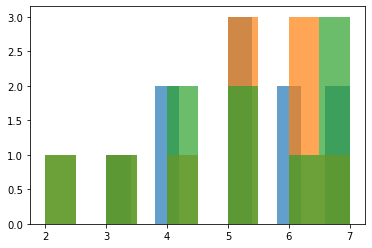

In [39]:
# binomial distribution

# tossing a coin 10 times with equal probability of getting each side
# repeat it 10, 100, 1000 times
rng = np.random.default_rng()
n, p = 10, .5  # number of trials, probability of each trial
size = [10, 100, 1000]
# make subplot maybe
'''for i in size: 
s = rng.binomial(10, .5, 1000)
#print(s)
   # plt.hist(s,label=i)
    #sns.distplot(s, hist=True, kde=True)'''
for i in size:
    s = rng.binomial(10, .5, 10)
    plt.hist(s, alpha=.7)
plt.show()

#### Exponential Distribution
It models the time betwen events, eg. how long would it takes until next visitor browsing the website. <br>
It is an inverse of Poisson distribution which models how many events happens within a given time. <br> e.G. given average visitor/hour =10; 
**plots**
- x-axis is the amount of time between events, y-axis is scaled so that the total area under the curve equals 1<br>
- goal is to find optimal value for lambda of given xy values


In [40]:
expon = rng.exponential (scale=1, size=100)

C:\Users\35383\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


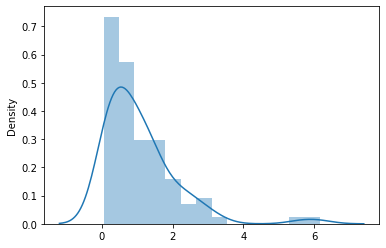

In [44]:
#plt.hist(expon)
sns.distplot(expon, kde=True)
plt.show()

#### Chi-square Distribution
(https://en.wikipedia.org/wiki/Chi-squared_distribution#Introduction) <br>
The chi-square distribution is widely used in **hypothesis testing** and contructing confidence interval. Chi-square test is used for determining if 2 categorical variables (gender, age range, preference of ice-cream flavours etc.) are **significantly correlated** or determining **goodness of fit** by comparing expected frequenycy to actual frequency at a certain level of confidence (usually 95%). <br>

It takes 2 parameters, degree of freedom (df), and size as shape of output.
shape of plot depends on degree of freedom (k)
mean = k; variance = 2k <br>
chi-square distribution with k degrees of freedom is the distribution of a sum of the squares of k independent standard normal random variables. It is usually used for hypothesis testing as it is related to normal distribution



In [87]:
# chi-square

#generate an output array of 2-row with 4-element each
x = rng.chisquare(df=2, size=[2,4]) 
print(x)
#sns.distplot(x)
plt.show()

[[1.79747035 0.49185824 1.36984738 0.30920011]
 [3.17652677 4.0389461  1.86179037 1.45899137]]


#### Uniform Distribution
(https://en.wikipedia.org/wiki/Discrete_uniform_distribution) <br>
Uniform distribution essentially means there are a known, finite number of outcomes, each has equal probability to happen. An example is throwing a fair dice, with 6 known, finite outcomes 1,2,3,4,5,6. Each time the die is thrown, the probability of a given outcome is 1/6.<br>
It has 3 parameters, low = lower bound, high = upper bound, size=shape of returned array.

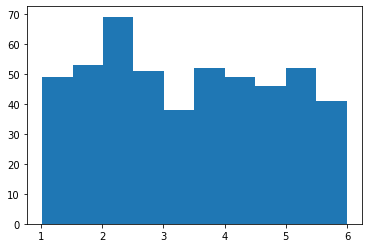

In [80]:
# uniform

s = rng.uniform(1,6,500)
#count, bins, ignored = plt.hist(s, 15, density=True)
plt.hist(s,bins=10)
#plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

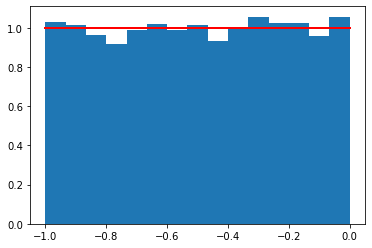

In [9]:
# uniform
import matplotlib.pyplot as plt
s = np.random.default_rng().uniform(-1,0,10000)
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

The larger the sample size, the closer the bar to the red line.

#### Normal Distribution
(https://en.wikipedia.org/wiki/Normal_distribution)
Normal distribution is well-known of its bell-shaped curve. It can apply in many events, for example height of a given group, test scores, blood pressure etc. It takes 3 parameters namely means, standard deviation and size which would define the shape of the plots. <br>


For example, distribution of height of student in a school with mean=150cm, standarda deviation=5cm, sample size=100.

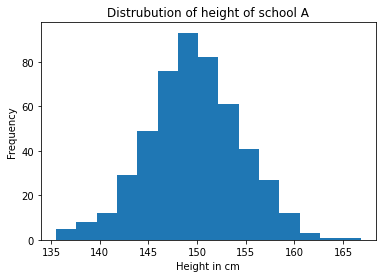

In [71]:
# normal
nor= rng.normal(150, 5, 500)
plt.hist(nor,bins=15)
plt.ylabel("Frequency")
plt.xlabel("Height in cm")
plt.title("Distrubution of height of school A")

plt.show()

## What is Seeding
Seeding is to make sure same sets of psuedo random number is generated for easier replication of output. If you provide the same seed, you will get the same output. And if you change the seed, you will get a different output. The output generated depends on the input given.<br/>
It is not absolutely necessary to seed, but it should be used if you want your code to produce repeatable outputs.<br>


In [ ]:
**How to Seed?**

In [103]:
seed = 2
seed2 = 10

rng=np.random.default_rng(seed=seed)
# generate 10 random float numbers between 0 and 1
print(rng.random(size = 10))

rng2 = np.random.default_rng(seed=seed2)
print(rng2.random(size=10))

# different seeds different output

[0.26161213 0.29849114 0.81422574 0.09191594 0.60010053 0.72856053
 0.18790107 0.05514663 0.27496937 0.65743301]
[0.95600171 0.20768181 0.82844489 0.14928212 0.51280462 0.1359196
 0.68903648 0.84174772 0.425509   0.956926  ]


In [105]:
rng=np.random.default_rng(seed=seed)
print(rng.random(size = 10))
# same seed same output

[0.26161213 0.29849114 0.81422574 0.09191594 0.60010053 0.72856053
 0.18790107 0.05514663 0.27496937 0.65743301]


<br>

**Without seed** <br>
Different output is generated every time.

In [106]:
rng=np.random.default_rng()
print (rng.random(size=10))
print (rng.random(size=10))
print (rng.random(size=10))

[0.06666797 0.89630717 0.83824844 0.37975446 0.31130554 0.80998773
 0.05758306 0.55155063 0.49020576 0.13540804]
[0.65026264 0.53697409 0.17851972 0.16942076 0.69406627 0.81838613
 0.48705831 0.42936526 0.0507575  0.82600262]
[0.35837896 0.48889788 0.18370619 0.13134499 0.15210518 0.12574341
 0.50148728 0.85776133 0.26194927 0.92346131]


**PCG64 vs MT19937**<br>
numpy.random recently changed the algorithm/PRNG from **Mersenne Twister** to **Permuted Congruential Generator(PCG64)**. Based on pcg-random.org, PCG is faster, more compact which means using less memory, harder to predict, support multiple streams (analogy of 1 code book vs multiple code books), smaller code size and complexity. <br>

https://www.pcg-random.org

https://numpy.org/doc/stable/reference/random/bit_generators/mt19937.html#numpy.random.MT19937
https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html#numpy.random.PCG64 

It works with other functions in random package, eg: numpy.random.normal to create normally distributed numbers or numpy.random.choice to generate a random sample from an input

## References
***

[1] 

[2]